In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from colour_demosaicing import masks_CFA_Bayer
from timeit import default_timer as timer

from heuristic1 import heuristic_1
from heuristic2 import heuristic_2
from heuristic3 import heuristic_3
from heuristic4 import heuristic_4

from utils import plot_channel

`lpar1` = 100, `lpar2` = [1000/3, 1000/3, 1000/3], `lpar3` = [1000/3, 1000/3, 1000/3], `lpar4` = [1000/3, 1000/3, 1000/3]

Heuristic 2: N_t + mu_t 333.7764775492251 is larger than lpar 333.3333333333333 in channel 0
Heuristic 2: N_t + mu_t 333.54118471965194 is larger than lpar 333.3333333333333 in channel 1
Heuristic 2: N_t + mu_t 333.33334075985476 is larger than lpar 333.3333333333333 in channel 2
Heuristic 3: N_t + mu_t 333.66013911490626 is larger than lpar 333.3333333333333 in channel 0
Heuristic 3: N_t + mu_t 333.695759055515 is larger than lpar 333.3333333333333 in channel 1
Heuristic 3: N_t + mu_t 333.6733407995348 is larger than lpar 333.3333333333333 in channel 2
Heuristic 4: N_t + mu_t 333.37255680561066 is larger than lpar 333.3333333333333 in channel 0
Heuristic 4: The region in channel 1 is too small: 2 pixels.
Heuristic 4: The region in channel 2 is too small: 2 pixels.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Heuristic 2: Sum of mu is 999.1059049922042. Store 5164 vertices. Block shape is [6, 4]. Minimal region area is 4. Run time is 10.193208400043659
Heuristic 3: Sum of mu is 999.4498271801793. Store 2375 vertices. Region shape is [6, 4].Run time is 2.3628366000484675
Heuristic 4: Sum of mu is 883.3137440313585. Store 15453 vertices. Minimal region area is 4. Run time is 32.794800699921325


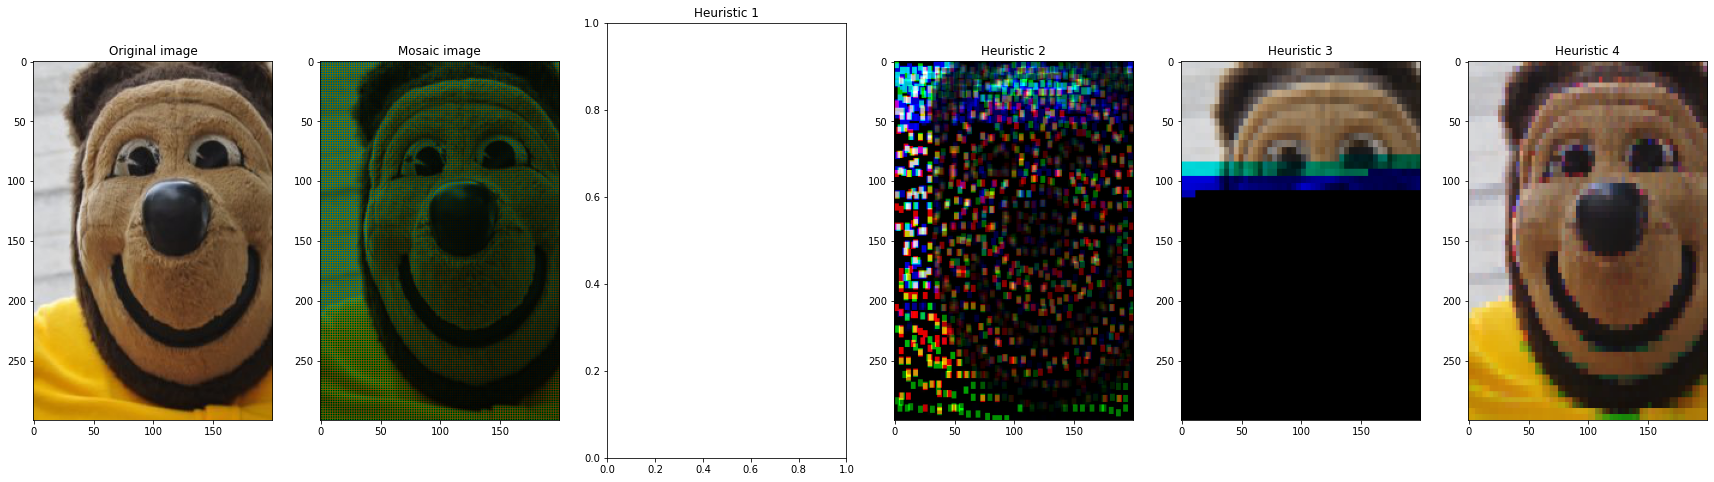

In [34]:
shape = (300, 200)
start = (50, 50)
image = imread('image/oski.png', 'png')   
image = image[start[0]:start[0]+shape[0], start[1]:start[1]+shape[1], :]

bayer_filter = np.stack(masks_CFA_Bayer(shape), axis=-1).astype(float)
mosaic_image = image * bayer_filter

lpar1 = 100
lpar2 = 1000
lpar3 = 1000
lpar4 = 1000

block_shape = [6, 4]
region_shape = [6, 4]
min_n_pix = 4

# start_1 = timer()
# _, Psi_1, mu_1, q_1 = heuristic_1(mosaic_image, [12, 8, 1], lpar=lpar1, tol=1e-2, verbose=False)
# end_1 = timer()

start_2 = timer()
Psi_2, mu_2, q_2 = heuristic_2(p_0=mosaic_image, block_shape=block_shape, min_n_pix=min_n_pix, lpars=[lpar2/3, lpar2/3, lpar2/3], verbose=False)
end_2 = timer()

start_3 = timer()
Psi_3, mu_3, q_3 = heuristic_3(p_0=mosaic_image, region_shape=region_shape, lpars=[lpar3/3, lpar3/3, lpar3/3], verbose=False)
end_3 = timer()

start_4 = timer()
Psi_4, mu_4, q_4 = heuristic_4(p_0=mosaic_image, min_n_pix=min_n_pix, lpars=[lpar4/3, lpar4/3, lpar4/3], verbose=False)
end_4 = timer()

# print(f'Heuristic 1: Sum of mu is {sum(mu_1)}. Store {len(q_1)} vertices. Run time is {end_1 - start_1}')
print(f'Heuristic 2: Sum of mu is {sum(mu_2)}. Store {len(q_2)} vertices. Block shape is {block_shape}. Minimal region area is {min_n_pix}. Run time is {end_2 - start_2}')
print(f'Heuristic 3: Sum of mu is {sum(mu_3)}. Store {len(q_3)} vertices. Region shape is {region_shape}. Run time is {end_3 - start_3}')
print(f'Heuristic 4: Sum of mu is {sum(mu_4)}. Store {len(q_4)} vertices. Minimal region area is {min_n_pix}. Run time is {end_4 - start_4}')

fig, axes = plt.subplots(1, 6, figsize=(30, 8))
axes[0].imshow(image)
axes[1].imshow(mosaic_image)
# axes[2].imshow(Psi_1)
axes[3].imshow(Psi_2)
axes[4].imshow(Psi_3)
axes[5].imshow(Psi_4)

axes[0].set_title('Original image')
axes[1].set_title('Mosaic image')
axes[2].set_title('Heuristic 1')
axes[3].set_title('Heuristic 2')
axes[4].set_title('Heuristic 3')
axes[5].set_title('Heuristic 4')
fig.savefig('comparison.png')



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


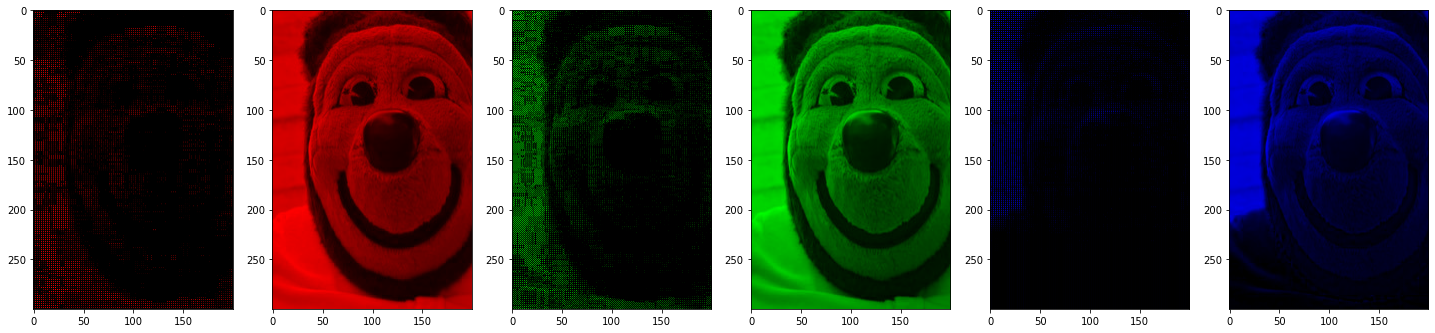

In [35]:
plot_channel(Psi_1, image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


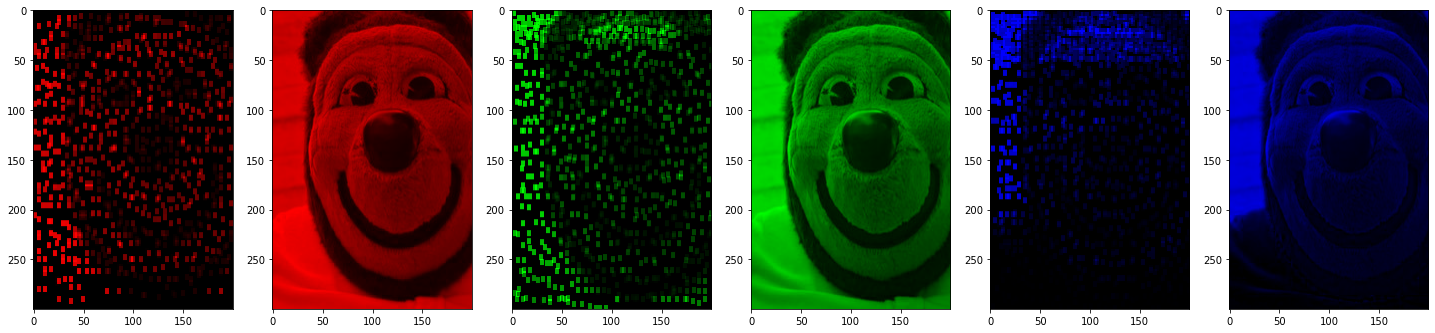

In [36]:
plot_channel(Psi_2, image)

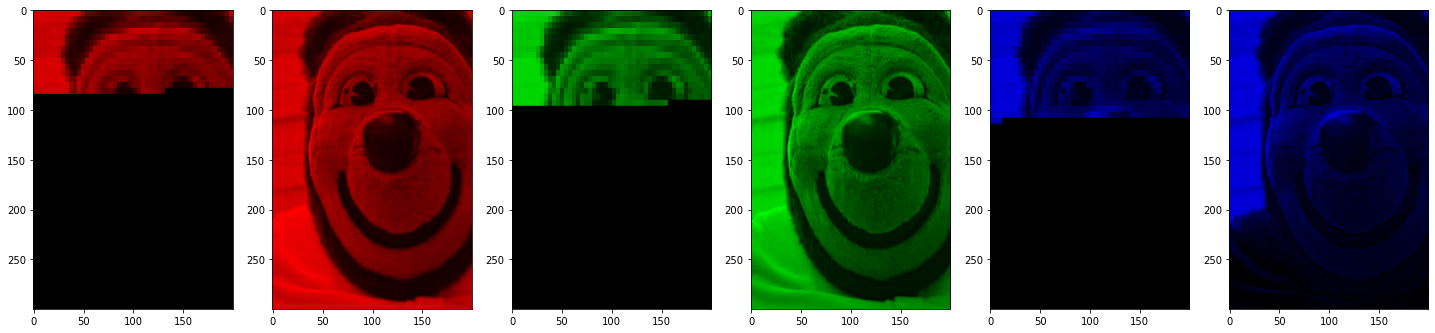

In [37]:
plot_channel(Psi_3, image)

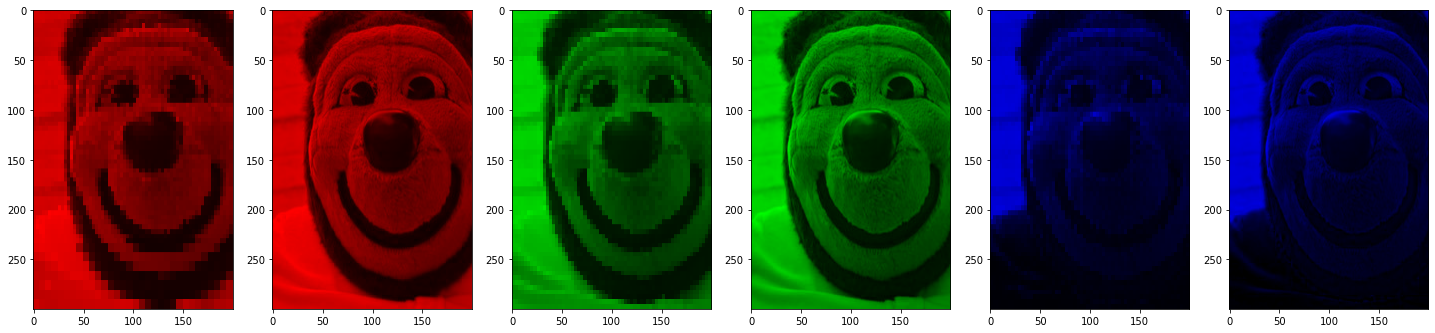

In [38]:
plot_channel(Psi_4, image)

`lpar1` = 100, `lpar2` = [5000/3, 5000/3, 5000/3], `lpar3` = [5000/3, 5000/3, 5000/3], `lpar4` = [5000/3, 5000/3, 5000/3]

Heuristic 2: The region in channel 0 is too small: 2 pixels.
Heuristic 2: The region in channel 1 is too small: 2 pixels.
Heuristic 2: The region in channel 2 is too small: 2 pixels.
Heuristic 4: The region in channel 0 is too small: 2 pixels.
Heuristic 4: The region in channel 1 is too small: 2 pixels.
Heuristic 4: The region in channel 2 is too small: 2 pixels.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Heuristic 2: Sum of mu is 3183.494187617209. Store 16383 vertices. Block shape is [6, 4]. Minimal region area is 4. Run time is 33.927617999957874
Heuristic 3: Sum of mu is 2869.2678430564943. Store 7500 vertices. Region shape is [6, 4]. Run time is 8.341728799976408
Heuristic 4: Sum of mu is 935.211783379782. Store 16383 vertices. Minimal region area is 4. Run time is 37.2417901000008


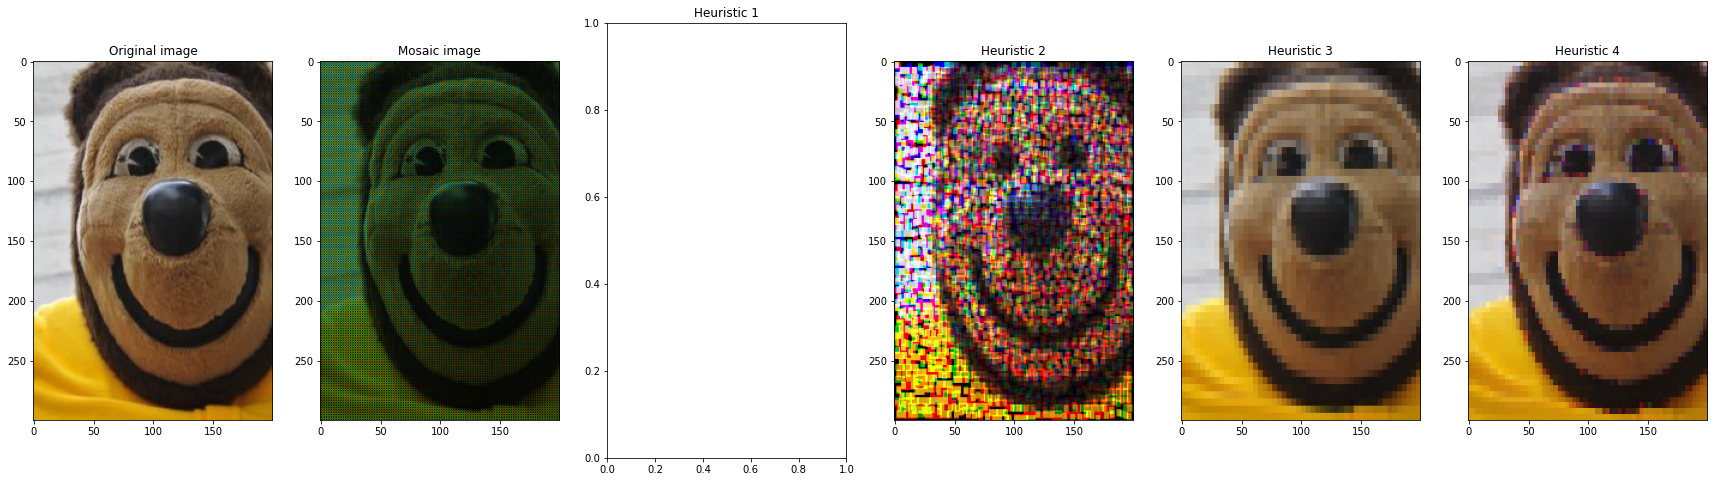

In [39]:
shape = (300, 200)
start = (50, 50)
image = imread('image/oski.png', 'png')   
image = image[start[0]:start[0]+shape[0], start[1]:start[1]+shape[1], :]

bayer_filter = np.stack(masks_CFA_Bayer(shape), axis=-1).astype(float)
mosaic_image = image * bayer_filter

lpar1 = 100
lpar2 = 5000
lpar3 = 5000
lpar4 = 5000

block_shape = [6, 4]
region_shape = [6, 4]
min_n_pix = 4

# start_1 = timer()
# _, Psi_1, mu_1, q_1 = heuristic_1(mosaic_image, [12, 8, 1], lpar=lpar1, tol=1e-2, verbose=False)
# end_1 = timer()

start_2 = timer()
Psi_2, mu_2, q_2 = heuristic_2(p_0=mosaic_image, block_shape=block_shape, min_n_pix=min_n_pix, lpars=[lpar2/3, lpar2/3, lpar2/3], verbose=False)
end_2 = timer()

start_3 = timer()
Psi_3, mu_3, q_3 = heuristic_3(p_0=mosaic_image, region_shape=region_shape, lpars=[lpar3/3, lpar3/3, lpar3/3], verbose=False)
end_3 = timer()

start_4 = timer()
Psi_4, mu_4, q_4 = heuristic_4(p_0=mosaic_image, min_n_pix=min_n_pix, lpars=[lpar4/3, lpar4/3, lpar4/3], verbose=False)
end_4 = timer()

# print(f'Heuristic 1: Sum of mu is {sum(mu_1)}. Store {len(q_1)} vertices. Run time is {end_1 - start_1}')
print(f'Heuristic 2: Sum of mu is {sum(mu_2)}. Store {len(q_2)} vertices. Block shape is {block_shape}. Minimal region area is {min_n_pix}. Run time is {end_2 - start_2}')
print(f'Heuristic 3: Sum of mu is {sum(mu_3)}. Store {len(q_3)} vertices. Region shape is {region_shape}. Run time is {end_3 - start_3}')
print(f'Heuristic 4: Sum of mu is {sum(mu_4)}. Store {len(q_4)} vertices. Minimal region area is {min_n_pix}. Run time is {end_4 - start_4}')

fig, axes = plt.subplots(1, 6, figsize=(30, 8))
axes[0].imshow(image)
axes[1].imshow(mosaic_image)
# axes[2].imshow(Psi_1)
axes[3].imshow(Psi_2)
axes[4].imshow(Psi_3)
axes[5].imshow(Psi_4)

axes[0].set_title('Original image')
axes[1].set_title('Mosaic image')
axes[2].set_title('Heuristic 1')
axes[3].set_title('Heuristic 2')
axes[4].set_title('Heuristic 3')
axes[5].set_title('Heuristic 4')
fig.savefig('comparison.png')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


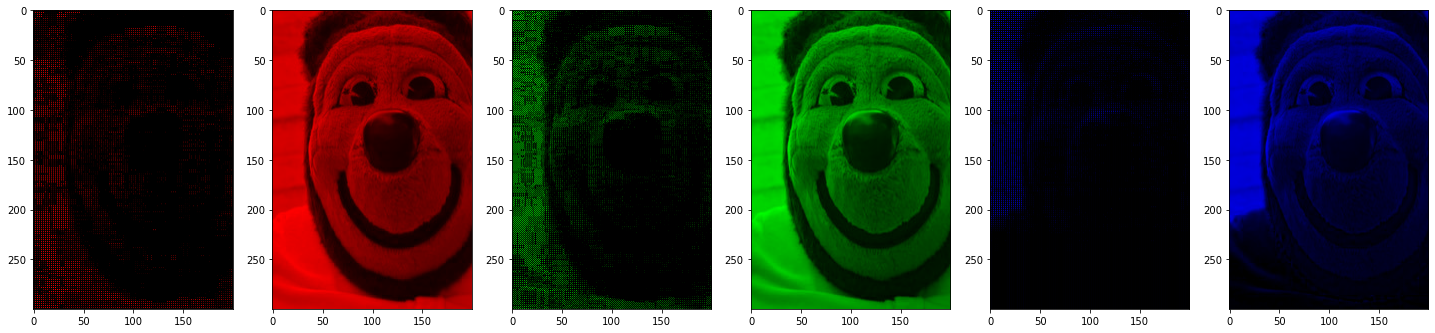

In [40]:
plot_channel(Psi_1, image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


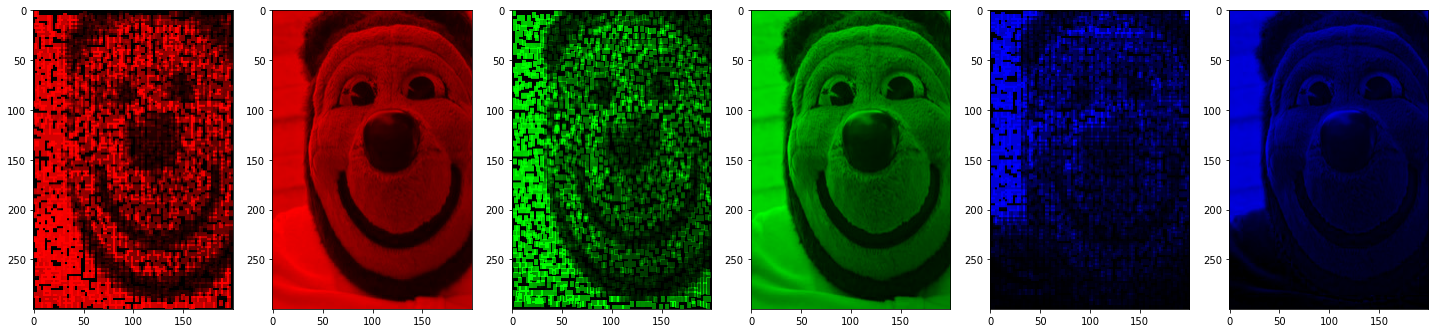

In [41]:
plot_channel(Psi_2, image)

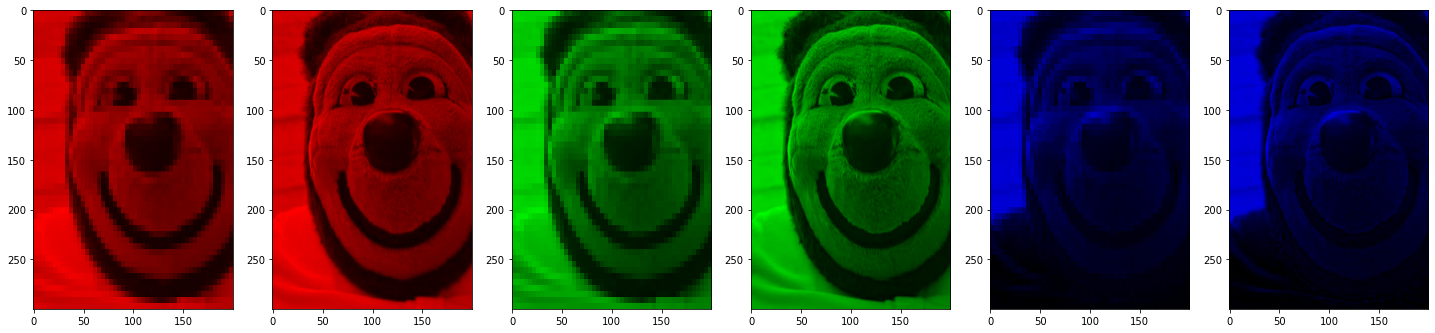

In [42]:
plot_channel(Psi_3, image)

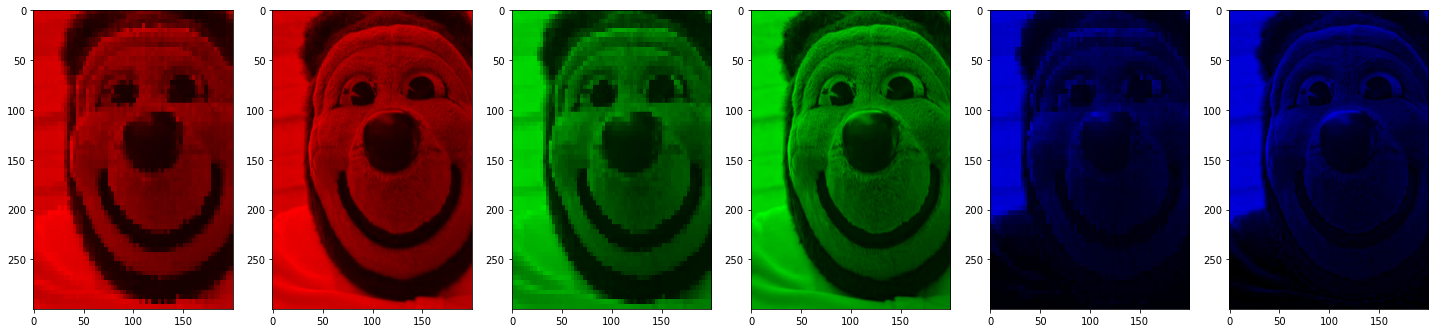

In [43]:
plot_channel(Psi_4, image)